In [1]:
import pandas as pd
df = pd.read_csv('/content/LoanExport.csv')

<ipython-input-1-b51100b98478>:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/LoanExport.csv')


In [2]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [3]:
df.isnull().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,0
MaturityDate,0
MSA,0
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0


In [4]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
291446,False
291447,False
291448,False
291449,False


In [5]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM', 'ProductType', 'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose', 'NumBorrowers', 'SellerName', 'ServicerName']


In [6]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
for column in categorical_columns.columns:
    unique_categories = df[column].unique()
    print(f"Unique categories in '{column}':")
    print(unique_categories)
    print()

Unique categories in 'FirstTimeHomebuyer':
['N' 'X' 'Y']

Unique categories in 'MSA':
['16974' '19740' '29940' '31084' '35644' 'X    ' '36740' '25540' '48620'
 '12060' '12420' '13140' '13644' '15764' '16700' '16940' '17900' '19124'
 '20500' '20764' '21340' '22380' '22744' '23060' '23104' '24660' '24860'
 '25060' '26900' '27060' '27140' '27260' '28420' '29404' '30780' '31340'
 '33124' '33340' '33460' '34820' '35004' '35084' '35380' '37100' '38060'
 '38300' '38900' '39300' '39340' '39820' '40060' '40140' '40900' '41180'
 '41620' '41700' '41740' '41884' '42044' '42220' '42644' '43900' '46060'
 '46700' '47644' '47894' '49180' '49420' '11340' '12100' '14500' '17820'
 '17860' '19340' '19804' '28140' '29740' '36084' '36500' '37460' '42060'
 '47260' '48424' '12580' '14484' '14860' '19380' '26420' '29420' '29620'
 '36540' '37764' '37860' '37964' '38940' '40380' '45300' '19660' '11300'
 '11460' '12220' '12940' '13820' '13980' '14740' '15540' '16740' '17140'
 '17460' '17780' '22220' '23420' '2384

In [7]:
df = df.drop(columns=['LoanSeqNum', 'ProductType'])

In [8]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'PropertyState', 'PropertyType',
       'PostalCode', 'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers',
       'SellerName', 'ServicerName', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment'],
      dtype='object')

In [9]:
columns_with_X = []
for column in df.columns:
    if df[column].astype(str).str.contains('X').any():
        columns_with_X.append(column)

In [10]:
columns_with_X

['FirstTimeHomebuyer',
 'MSA',
 'PPM',
 'PropertyState',
 'PropertyType',
 'PostalCode',
 'NumBorrowers']

In [11]:
import numpy as np
columns_to_check = ['MSA', 'PropertyState', 'PropertyType', 'PostalCode', 'NumBorrowers','FirstTimeHomebuyer','PPM']
for col in columns_to_check:
    print(f"Unique values in {col}: {df[col].unique()}")
df[columns_to_check] = df[columns_to_check].apply(lambda x: x.str.strip())
df[columns_to_check] = df[columns_to_check].replace('X', np.nan)


Unique values in MSA: ['16974' '19740' '29940' '31084' '35644' 'X    ' '36740' '25540' '48620'
 '12060' '12420' '13140' '13644' '15764' '16700' '16940' '17900' '19124'
 '20500' '20764' '21340' '22380' '22744' '23060' '23104' '24660' '24860'
 '25060' '26900' '27060' '27140' '27260' '28420' '29404' '30780' '31340'
 '33124' '33340' '33460' '34820' '35004' '35084' '35380' '37100' '38060'
 '38300' '38900' '39300' '39340' '39820' '40060' '40140' '40900' '41180'
 '41620' '41700' '41740' '41884' '42044' '42220' '42644' '43900' '46060'
 '46700' '47644' '47894' '49180' '49420' '11340' '12100' '14500' '17820'
 '17860' '19340' '19804' '28140' '29740' '36084' '36500' '37460' '42060'
 '47260' '48424' '12580' '14484' '14860' '19380' '26420' '29420' '29620'
 '36540' '37764' '37860' '37964' '38940' '40380' '45300' '19660' '11300'
 '11460' '12220' '12940' '13820' '13980' '14740' '15540' '16740' '17140'
 '17460' '17780' '22220' '23420' '23844' '24340' '24780' '26180' '27620'
 '31420' '31540' '34980' '353

In [12]:
df.isnull().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,78015
MaturityDate,0
MSA,39100
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  213436 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 252351 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 286046 non-null  object 
 15  PropertyState       291451 non-nul

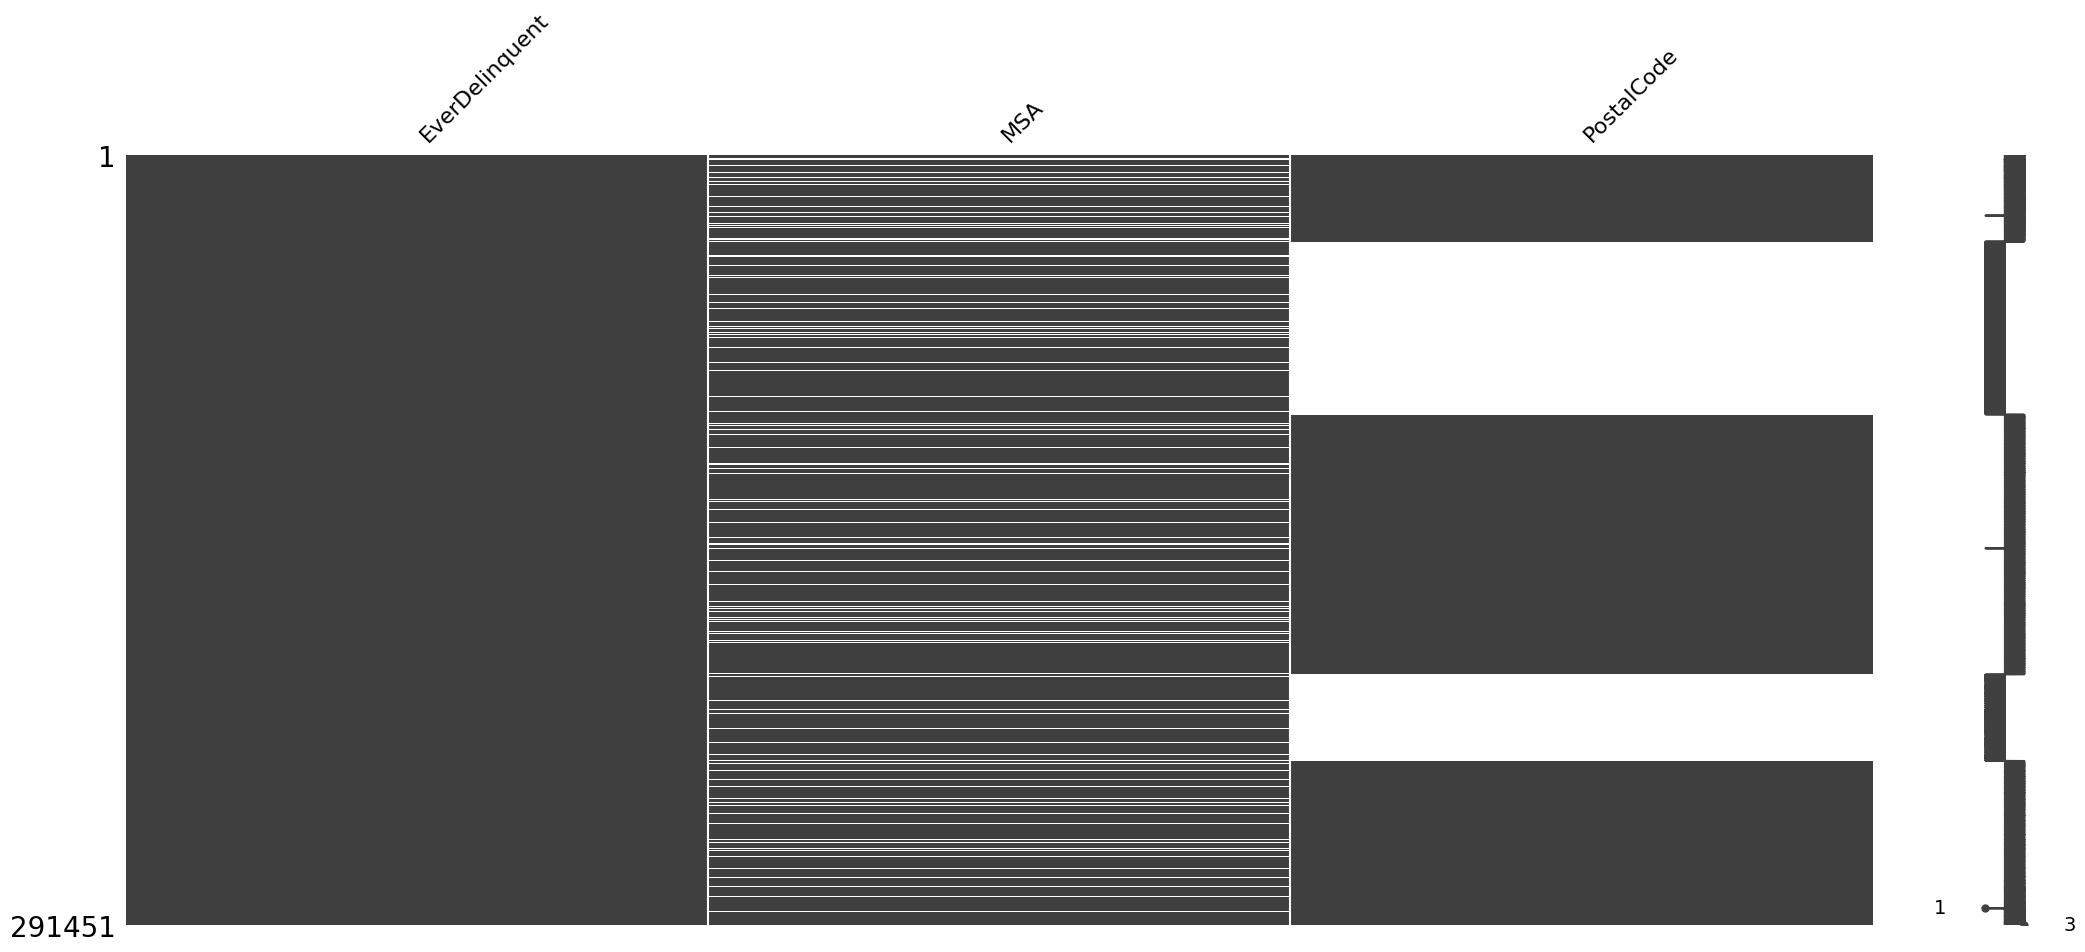

In [14]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df[['EverDelinquent', 'MSA', 'PostalCode']])
plt.show()

In [15]:
len(df)

291451

In [16]:
df = df.dropna(subset=['NumBorrowers', 'PropertyType'])

In [17]:
len(df)

291090

In [18]:
unique_values = df['EverDelinquent'].unique()

In [19]:
unique_values

array([0, 1])

In [20]:
df = df.drop(columns=[ 'PostalCode'])

In [21]:
df.isnull().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,77849
MaturityDate,0
MSA,39047
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0


In [22]:
proportions = df['MSA'].dropna().value_counts(normalize=True)

# Get unique values and their corresponding proportions
unique_values = proportions.index
probs = proportions.values

# Define the imputation function
def impute_with_proportions(value):
    if pd.isnull(value):
        return np.random.choice(unique_values, p=probs)
    else:
        return value

# Apply the imputation function
df['MSA'] = df['MSA'].apply(impute_with_proportions)

In [23]:
df.isnull().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,77849
MaturityDate,0
MSA,0
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0


In [24]:
df['FirstTimeHomebuyer'] = df['FirstTimeHomebuyer'].replace({'Y': 1, 'N':0})

In [25]:
unique_values = df['FirstTimeHomebuyer'].unique()

In [26]:
unique_values

array([ 0., nan,  1.])

In [27]:
prop_1 = df['FirstTimeHomebuyer'].mean()
prop_0 = 1 - prop_1

# Impute values based on the proportion
df['FirstTimeHomebuyer'] = df['FirstTimeHomebuyer'].apply(
    lambda x: np.random.choice([0, 1], p=[prop_0, prop_1]) if pd.isna(x) else x
)

In [28]:
df.isnull().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,0
MaturityDate,0
MSA,0
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0


In [29]:
df['PPM'] = df['PPM'].replace({'Y': 1, 'N':0})

In [30]:
unique_values = df['FirstTimeHomebuyer'].unique()

In [31]:
unique_values


array([0., 1.])

In [32]:
prop_11 = df['PPM'].mean()
prop_00 = 1 - prop_11

# Impute values based on the proportion
df['PPM'] = df['PPM'].apply(
    lambda x: np.random.choice([0, 1], p=[prop_0, prop_1]) if pd.isna(x) else x
)

In [33]:
df.isnull().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,0
MaturityDate,0
MSA,0
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0


In [34]:

value_counts = df['SellerName'].value_counts(normalize=True)

# Function to impute missing values proportionally
def impute_proportional_random(df, column):
    # Get the indices where the values are missing
    missing_indices = df[df[column].isnull()].index

    # Get the list of values and their corresponding probabilities
    values = value_counts.index
    probabilities = value_counts.values

    # Randomly choose a value based on the probabilities
    imputed_values = np.random.choice(values, size=len(missing_indices), p=probabilities)

    # Fill the missing values
    df.loc[missing_indices, column] = imputed_values

    return df

# Apply the function to the 'SellerName' column
df = impute_proportional_random(df, 'SellerName')


In [35]:
df.isnull().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,0
MaturityDate,0
MSA,0
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0


In [36]:
df['FirstPaymentDate'] = df['FirstPaymentDate'].astype(str).str.zfill(6)
df['MaturityDate'] = df['MaturityDate'].astype(str).str.zfill(6)

# Format to 'YYYY-MM'
df['FirstPaymentDate'] = df['FirstPaymentDate'].apply(lambda x: f"{x[:4]}-{x[4:]}")
df['MaturityDate'] = df['MaturityDate'].apply(lambda x: f"{x[:4]}-{x[4:]}")

# Convert to datetime format
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'], format='%Y-%m', errors='coerce')
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y-%m', errors='coerce')

In [37]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02-01,0.0,2029-01-01,16974,25,1,O,89,27,...,IL,SF,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-02-01,0.0,2029-01-01,19740,0,1,O,73,17,...,CO,SF,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-02-01,0.0,2029-01-01,29940,0,1,O,75,16,...,KS,SF,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-02-01,0.0,2029-01-01,31084,0,1,O,76,14,...,CA,SF,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-02-01,0.0,2029-01-01,35644,0,1,O,78,18,...,NJ,SF,N,360,2,GM,GMACMTGECORP,0,0,54


In [38]:
df.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
291446,839,1999-03-01,0.0,2029-02-01,37964,0,1,O,60,32,...,PA,SF,N,360,2,Ot,Other servicers,0,0,12
291447,840,2002-10-01,0.0,2029-04-01,35644,0,1,O,73,0,...,NY,SF,P,319,2,Ot,Other servicers,0,0,53
291448,840,2003-04-01,0.0,2029-04-01,42044,0,1,O,73,31,...,CA,SF,N,313,1,Ot,Other servicers,0,0,38
291449,845,1999-04-01,0.0,2029-03-01,37964,0,1,I,80,54,...,PA,SF,P,360,2,Ot,Other servicers,0,0,32
291450,849,1999-03-01,0.0,2029-02-01,37964,0,1,O,47,29,...,PA,SF,P,360,2,Ot,Other servicers,0,0,29


In [39]:
print(df['FirstPaymentDate'].dtypes)

datetime64[ns]


In [40]:
df = pd.get_dummies(df, columns=['Occupancy', 'Channel', 'LoanPurpose'], drop_first=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291090 entries, 0 to 291450
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291090 non-null  int64         
 1   FirstPaymentDate    291090 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291090 non-null  float64       
 3   MaturityDate        291090 non-null  datetime64[ns]
 4   MSA                 291090 non-null  object        
 5   MIP                 291090 non-null  int64         
 6   Units               291090 non-null  int64         
 7   OCLTV               291090 non-null  int64         
 8   DTI                 291090 non-null  int64         
 9   OrigUPB             291090 non-null  int64         
 10  LTV                 291090 non-null  int64         
 11  OrigInterestRate    291090 non-null  float64       
 12  PPM                 291090 non-null  float64       
 13  PropertyState       291090 non-nul

In [42]:
df['Occupancy_S'] = df['Occupancy_S'].astype(int)
df['Occupancy_O'] = df['Occupancy_O'].astype(int)


df['Channel_R'] = df['Channel_R'].astype(int)
df['Channel_C'] = df['Channel_C'].astype(int)
df['Channel_T'] = df['Channel_T'].astype(int)

df['LoanPurpose_N']= df['LoanPurpose_N'].astype(int)
df['LoanPurpose_P']= df['LoanPurpose_P'].astype(int)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291090 entries, 0 to 291450
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291090 non-null  int64         
 1   FirstPaymentDate    291090 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291090 non-null  float64       
 3   MaturityDate        291090 non-null  datetime64[ns]
 4   MSA                 291090 non-null  object        
 5   MIP                 291090 non-null  int64         
 6   Units               291090 non-null  int64         
 7   OCLTV               291090 non-null  int64         
 8   DTI                 291090 non-null  int64         
 9   OrigUPB             291090 non-null  int64         
 10  LTV                 291090 non-null  int64         
 11  OrigInterestRate    291090 non-null  float64       
 12  PPM                 291090 non-null  float64       
 13  PropertyState       291090 non-nul

In [44]:
df['FirstTimeHomebuyer'].unique()

array([0., 1.])

In [45]:
df['FirstTimeHomebuyer']= df['FirstTimeHomebuyer'].astype(int)
df['PPM']= df['PPM'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291090 entries, 0 to 291450
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291090 non-null  int64         
 1   FirstPaymentDate    291090 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291090 non-null  int64         
 3   MaturityDate        291090 non-null  datetime64[ns]
 4   MSA                 291090 non-null  object        
 5   MIP                 291090 non-null  int64         
 6   Units               291090 non-null  int64         
 7   OCLTV               291090 non-null  int64         
 8   DTI                 291090 non-null  int64         
 9   OrigUPB             291090 non-null  int64         
 10  LTV                 291090 non-null  int64         
 11  OrigInterestRate    291090 non-null  float64       
 12  PPM                 291090 non-null  int64         
 13  PropertyState       291090 non-nul

In [47]:
df['MSA'] = df['MSA'].str.strip()
frequency_map = df['MSA'].value_counts(normalize=True)
df['MSA_encoded'] = df['MSA'].map(frequency_map)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291090 entries, 0 to 291450
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291090 non-null  int64         
 1   FirstPaymentDate    291090 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291090 non-null  int64         
 3   MaturityDate        291090 non-null  datetime64[ns]
 4   MSA                 291090 non-null  object        
 5   MIP                 291090 non-null  int64         
 6   Units               291090 non-null  int64         
 7   OCLTV               291090 non-null  int64         
 8   DTI                 291090 non-null  int64         
 9   OrigUPB             291090 non-null  int64         
 10  LTV                 291090 non-null  int64         
 11  OrigInterestRate    291090 non-null  float64       
 12  PPM                 291090 non-null  int64         
 13  PropertyState       291090 non-nul

In [49]:
df['MSA_encoded'].unique()

array([3.49204713e-02, 2.19760212e-02, 3.16053454e-04, 3.68683225e-02,
       1.64656979e-02, 1.70771926e-02, 6.27984472e-03, 8.76704799e-03,
       4.23236800e-03, 2.37383627e-03, 2.76959016e-02, 6.16991309e-03,
       5.84011818e-04, 6.25579718e-03, 6.56841527e-03, 2.31543509e-03,
       4.29420454e-04, 3.26359545e-03, 1.34357072e-02, 2.41162527e-03,
       9.30296472e-03, 7.86698272e-04, 6.04623999e-04, 9.04874781e-03,
       1.62836236e-03, 5.62712563e-03, 3.04373218e-03, 2.81356282e-03,
       4.53468000e-04, 7.52688172e-03, 1.16802364e-04, 9.30983545e-04,
       5.01906627e-03, 8.31357999e-04, 4.45566663e-03, 1.09931636e-03,
       8.00439727e-04, 4.47284345e-03, 1.49575733e-02, 1.64210382e-03,
       9.33388299e-03, 6.73331272e-03, 3.11931018e-03, 6.04623999e-03,
       2.44666598e-02, 5.18396372e-03, 1.63145419e-02, 4.26328627e-03,
       3.39070391e-03, 7.52344636e-04, 5.63399636e-03, 1.35765571e-02,
       1.05946614e-02, 1.10103404e-02, 7.93568999e-03, 3.23611254e-03,
      

In [50]:
df['MSA'].unique()

array(['16974', '19740', '29940', '31084', '35644', '42644', '33124',
       '36740', '25540', '48620', '12060', '12420', '13140', '13644',
       '15764', '16700', '16940', '17900', '19124', '20500', '20764',
       '21340', '22380', '22744', '23060', '23104', '24660', '24860',
       '25060', '26900', '27060', '27140', '27260', '28420', '29404',
       '30780', '31340', '33340', '33460', '34820', '35004', '35084',
       '35380', '37100', '38060', '38300', '38900', '39300', '39340',
       '39820', '40060', '40140', '40900', '41180', '41620', '41700',
       '41740', '41884', '42044', '42220', '43900', '46060', '46700',
       '47644', '47894', '49180', '49420', '35300', '15500', '33700',
       '26820', '17460', '37964', '10580', '10780', '47260', '49660',
       '33660', '31540', '45780', '14860', '16740', '41940', '11340',
       '12100', '14500', '17820', '17860', '19340', '19804', '28140',
       '29740', '36084', '36500', '37460', '42060', '48424', '45820',
       '28020', '325

In [51]:
df = df.drop('MSA', axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291090 entries, 0 to 291450
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291090 non-null  int64         
 1   FirstPaymentDate    291090 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291090 non-null  int64         
 3   MaturityDate        291090 non-null  datetime64[ns]
 4   MIP                 291090 non-null  int64         
 5   Units               291090 non-null  int64         
 6   OCLTV               291090 non-null  int64         
 7   DTI                 291090 non-null  int64         
 8   OrigUPB             291090 non-null  int64         
 9   LTV                 291090 non-null  int64         
 10  OrigInterestRate    291090 non-null  float64       
 11  PPM                 291090 non-null  int64         
 12  PropertyState       291090 non-null  object        
 13  PropertyType        291090 non-nul

In [53]:
df['NumBorrowers']= df['NumBorrowers'].astype(int)

In [54]:
df['NumBorrowers'].unique()

array([2, 1])

In [55]:
df['PropertyState'] = df['PropertyState'].str.strip()
frequency_map = df['PropertyState'].value_counts(normalize=True)
df['PropertyState'] = df['PropertyState'].map(frequency_map)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291090 entries, 0 to 291450
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291090 non-null  int64         
 1   FirstPaymentDate    291090 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291090 non-null  int64         
 3   MaturityDate        291090 non-null  datetime64[ns]
 4   MIP                 291090 non-null  int64         
 5   Units               291090 non-null  int64         
 6   OCLTV               291090 non-null  int64         
 7   DTI                 291090 non-null  int64         
 8   OrigUPB             291090 non-null  int64         
 9   LTV                 291090 non-null  int64         
 10  OrigInterestRate    291090 non-null  float64       
 11  PPM                 291090 non-null  int64         
 12  PropertyState       291090 non-null  float64       
 13  PropertyType        291090 non-nul

In [57]:
df = pd.get_dummies(df, columns=['PropertyType'], drop_first=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291090 entries, 0 to 291450
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291090 non-null  int64         
 1   FirstPaymentDate    291090 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291090 non-null  int64         
 3   MaturityDate        291090 non-null  datetime64[ns]
 4   MIP                 291090 non-null  int64         
 5   Units               291090 non-null  int64         
 6   OCLTV               291090 non-null  int64         
 7   DTI                 291090 non-null  int64         
 8   OrigUPB             291090 non-null  int64         
 9   LTV                 291090 non-null  int64         
 10  OrigInterestRate    291090 non-null  float64       
 11  PPM                 291090 non-null  int64         
 12  PropertyState       291090 non-null  float64       
 13  OrigLoanTerm        291090 non-nul

In [59]:
df['PropertyType_CP'] = df['PropertyType_CP'].astype(int)
df['PropertyType_LH'] = df['PropertyType_LH'].astype(int)
df['PropertyType_MH'] = df['PropertyType_MH'].astype(int)
df['PropertyType_PU'] = df['PropertyType_PU'].astype(int)
df['PropertyType_SF'] = df['PropertyType_SF'].astype(int)

In [60]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,...,Channel_R,Channel_T,LoanPurpose_N,LoanPurpose_P,MSA_encoded,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF
0,0,1999-02-01,0,2029-01-01,25,1,89,27,117000,89,...,0,1,0,1,0.034920,0,0,0,0,1
1,0,1999-02-01,0,2029-01-01,0,1,73,17,109000,73,...,1,0,1,0,0.021976,0,0,0,0,1
2,0,1999-02-01,0,2029-01-01,0,1,75,16,88000,75,...,0,1,1,0,0.000316,0,0,0,0,1
3,0,1999-02-01,0,2029-01-01,0,1,76,14,160000,76,...,1,0,1,0,0.036868,0,0,0,0,1
4,0,1999-02-01,0,2029-01-01,0,1,78,18,109000,78,...,1,0,1,0,0.016466,0,0,0,0,1


In [61]:
df['SellerName'] = df['SellerName'].str.strip()
frequency_map = df['SellerName'].value_counts(normalize=True)
df['SellerName'] = df['SellerName'].map(frequency_map)

In [62]:
df['ServicerName'] = df['ServicerName'].str.strip()
frequency_map = df['ServicerName'].value_counts(normalize=True)
df['ServicerName'] = df['ServicerName'].map(frequency_map)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291090 entries, 0 to 291450
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291090 non-null  int64         
 1   FirstPaymentDate    291090 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291090 non-null  int64         
 3   MaturityDate        291090 non-null  datetime64[ns]
 4   MIP                 291090 non-null  int64         
 5   Units               291090 non-null  int64         
 6   OCLTV               291090 non-null  int64         
 7   DTI                 291090 non-null  int64         
 8   OrigUPB             291090 non-null  int64         
 9   LTV                 291090 non-null  int64         
 10  OrigInterestRate    291090 non-null  float64       
 11  PPM                 291090 non-null  int64         
 12  PropertyState       291090 non-null  float64       
 13  OrigLoanTerm        291090 non-nul

In [64]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,...,Channel_R,Channel_T,LoanPurpose_N,LoanPurpose_P,MSA_encoded,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF
0,0,1999-02-01,0,2029-01-01,25,1,89,27,117000,89,...,0,1,0,1,0.034920,0,0,0,0,1
1,0,1999-02-01,0,2029-01-01,0,1,73,17,109000,73,...,1,0,1,0,0.021976,0,0,0,0,1
2,0,1999-02-01,0,2029-01-01,0,1,75,16,88000,75,...,0,1,1,0,0.000316,0,0,0,0,1
3,0,1999-02-01,0,2029-01-01,0,1,76,14,160000,76,...,1,0,1,0,0.036868,0,0,0,0,1
4,0,1999-02-01,0,2029-01-01,0,1,78,18,109000,78,...,1,0,1,0,0.016466,0,0,0,0,1


In [65]:
from sklearn.preprocessing import StandardScaler

# Define the columns to standardize (numerical columns)
numerical_columns = ['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'MonthsDelinquent', 'MonthsInRepayment']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [66]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,...,Channel_R,Channel_T,LoanPurpose_N,LoanPurpose_P,MSA_encoded,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF
0,-10.36213,1999-02-01,0,2029-01-01,1.247595,-0.12759,0.790072,-0.231570,-0.147447,0.792118,...,0,1,0,1,0.034920,0,0,0,0,1
1,-10.36213,1999-02-01,0,2029-01-01,-0.728799,-0.12759,-0.259891,-0.989968,-0.296790,-0.258594,...,1,0,1,0,0.021976,0,0,0,0,1
2,-10.36213,1999-02-01,0,2029-01-01,-0.728799,-0.12759,-0.128645,-1.065807,-0.688815,-0.127255,...,0,1,1,0,0.000316,0,0,0,0,1
3,-10.36213,1999-02-01,0,2029-01-01,-0.728799,-0.12759,-0.063023,-1.217487,0.655271,-0.061586,...,1,0,1,0,0.036868,0,0,0,0,1
4,-10.36213,1999-02-01,0,2029-01-01,-0.728799,-0.12759,0.068223,-0.914128,-0.296790,0.069754,...,1,0,1,0,0.016466,0,0,0,0,1


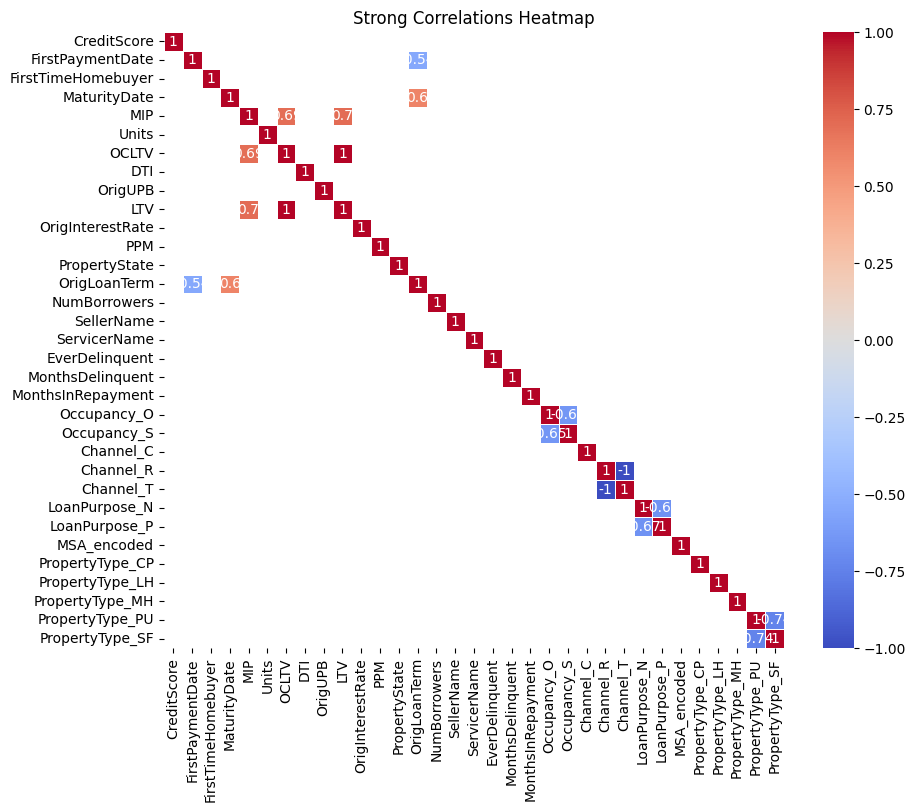

In [67]:
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = df.corr()

# Filter the matrix to only show correlations above 0.5 or below -0.5
strong_corr = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='white')

plt.title('Strong Correlations Heatmap')
plt.show()

In [68]:
df['LoanTermMonths'] = (df['MaturityDate'] - df['FirstPaymentDate']).dt.days // 30

In [69]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,...,Channel_T,LoanPurpose_N,LoanPurpose_P,MSA_encoded,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,LoanTermMonths
0,-10.36213,1999-02-01,0,2029-01-01,1.247595,-0.12759,0.790072,-0.231570,-0.147447,0.792118,...,1,0,1,0.034920,0,0,0,0,1,364
1,-10.36213,1999-02-01,0,2029-01-01,-0.728799,-0.12759,-0.259891,-0.989968,-0.296790,-0.258594,...,0,1,0,0.021976,0,0,0,0,1,364
2,-10.36213,1999-02-01,0,2029-01-01,-0.728799,-0.12759,-0.128645,-1.065807,-0.688815,-0.127255,...,1,1,0,0.000316,0,0,0,0,1,364
3,-10.36213,1999-02-01,0,2029-01-01,-0.728799,-0.12759,-0.063023,-1.217487,0.655271,-0.061586,...,0,1,0,0.036868,0,0,0,0,1,364
4,-10.36213,1999-02-01,0,2029-01-01,-0.728799,-0.12759,0.068223,-0.914128,-0.296790,0.069754,...,0,1,0,0.016466,0,0,0,0,1,364


In [70]:
df['LoanTermMonths'].unique()

array([364, 348, 309, 338, 325, 330, 332, 362, 359, 360, 358, 350, 354,
       337, 328, 347, 352, 316, 319, 339, 363, 321, 357, 333, 322, 335,
       318, 323, 341, 315, 331, 340, 355, 336, 320, 334, 361, 349, 344,
       329, 342, 327, 351, 356, 345, 310, 312, 353, 307, 313, 326, 343,
       304, 346, 308, 317, 324, 305, 311, 306, 365, 314])

In [71]:
df= df.drop(columns=['FirstPaymentDate','MaturityDate'])

In [72]:
df.head()

,CreditScore,FirstTimeHomebuyer,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,PPM,...,Channel_T,LoanPurpose_N,LoanPurpose_P,MSA_encoded,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,LoanTermMonths
0,-10.36213,0,1.247595,-0.12759,0.790072,-0.231570,-0.147447,0.792118,-0.513394,0,...,1,0,1,0.034920,0,0,0,0,1,364
1,-10.36213,0,-0.728799,-0.12759,-0.259891,-0.989968,-0.296790,-0.258594,-1.243140,0,...,0,1,0,0.021976,0,0,0,0,1,364
2,-10.36213,0,-0.728799,-0.12759,-0.128645,-1.065807,-0.688815,-0.127255,-0.148522,0,...,1,1,0,0.000316,0,0,0,0,1,364
3,-10.36213,0,-0.728799,-0.12759,-0.063023,-1.217487,0.655271,-0.061586,-0.148522,0,...,0,1,0,0.036868,0,0,0,0,1,364
4,-10.36213,0,-0.728799,-0.12759,0.068223,-0.914128,-0.296790,0.069754,0.581224,0,...,0,1,0,0.016466,0,0,0,0,1,364


In [73]:
df.tail()

,CreditScore,FirstTimeHomebuyer,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,PPM,...,Channel_T,LoanPurpose_N,LoanPurpose_P,MSA_encoded,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,LoanTermMonths
291446,1.901147,0,-0.728799,-0.12759,-1.112986,0.147629,-0.651480,-1.112298,0.216351,0,...,0,1,0,0.010468,0,0,0,0,1,364
291447,1.915764,0,-0.728799,-0.12759,-0.259891,-2.279244,2.652733,-0.258594,-1.608013,0,...,0,0,1,0.016466,0,0,0,0,1,322
291448,1.915764,0,-0.728799,-0.12759,-0.259891,0.071789,-0.707483,-0.258594,-3.797249,0,...,0,1,0,0.019946,0,0,0,0,1,316
291449,1.988847,0,-0.728799,-0.12759,0.199468,1.816104,-0.688815,0.201093,0.216351,0,...,0,0,1,0.010468,0,0,0,0,1,364
291450,2.047313,0,-0.728799,-0.12759,-1.966081,-0.079890,-1.024837,-1.966002,0.216351,0,...,0,0,1,0.010468,0,0,0,0,1,364


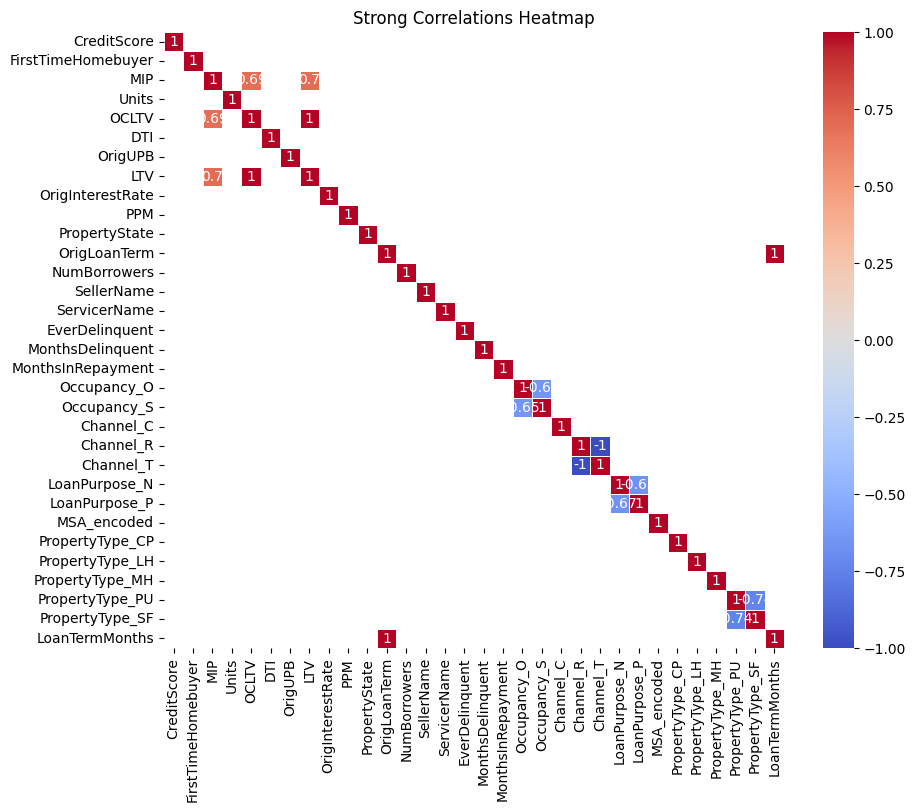

In [74]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Filter the matrix to only show correlations above 0.5 or below -0.5
strong_corr = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='white')

plt.title('Strong Correlations Heatmap')
plt.show()

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with the target variable and features

# Target variable
target = 'EverDelinquent'

# Features and target split
X = df.drop(columns=[target])  # Drop the target variable
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importances_df)

# Optionally, select top features based on importance
threshold = 0.01  # Define a threshold for feature selection
important_features = importances_df[importances_df['Importance'] > threshold]['Feature'].tolist()

print("Selected Features:", important_features)


               Feature  Importance
15    MonthsDelinquent    0.895204
0          CreditScore    0.034660
16   MonthsInRepayment    0.028747
6              OrigUPB    0.005115
5                  DTI    0.004363
14        ServicerName    0.003995
24         MSA_encoded    0.003968
8     OrigInterestRate    0.003673
10       PropertyState    0.003388
7                  LTV    0.003147
4                OCLTV    0.003010
13          SellerName    0.002648
12        NumBorrowers    0.001961
2                  MIP    0.001456
22       LoanPurpose_N    0.000576
23       LoanPurpose_P    0.000539
1   FirstTimeHomebuyer    0.000499
20           Channel_R    0.000492
29     PropertyType_SF    0.000486
21           Channel_T    0.000457
17         Occupancy_O    0.000358
28     PropertyType_PU    0.000311
3                Units    0.000283
18         Occupancy_S    0.000192
9                  PPM    0.000141
11        OrigLoanTerm    0.000109
30      LoanTermMonths    0.000108
27     PropertyType_

In [76]:
from sklearn.feature_selection import f_classif, SelectKBest

# Assuming X is your feature matrix and y is the target variable
X = df.drop(columns=[target])  # Drop the target variable
y = df[target]
selector = SelectKBest(f_classif, k=10)  # Selecting top 10 features
X_new = selector.fit_transform(X, y)

# To see which features are selected
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['CreditScore', 'MIP', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'NumBorrowers', 'MonthsDelinquent',
       'MonthsInRepayment'],
      dtype='object')


In [77]:
columns_to_drop_1 = ['Units', 'PPM', 'Occupancy_S', 'LoanTermMonths',
                   'OrigLoanTerm', 'PropertyType_MH', 'Channel_C',
                   'PropertyType_LH', 'PropertyType_CP','PropertyType_PU']

# Dropping the columns from the DataFrame

df1= df.copy()
df1 = df1.drop(columns=columns_to_drop_1)

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291090 entries, 0 to 291450
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291090 non-null  float64
 1   FirstTimeHomebuyer  291090 non-null  int64  
 2   MIP                 291090 non-null  float64
 3   OCLTV               291090 non-null  float64
 4   DTI                 291090 non-null  float64
 5   OrigUPB             291090 non-null  float64
 6   LTV                 291090 non-null  float64
 7   OrigInterestRate    291090 non-null  float64
 8   PropertyState       291090 non-null  float64
 9   NumBorrowers        291090 non-null  int64  
 10  SellerName          291090 non-null  float64
 11  ServicerName        291090 non-null  float64
 12  EverDelinquent      291090 non-null  int64  
 13  MonthsDelinquent    291090 non-null  float64
 14  MonthsInRepayment   291090 non-null  float64
 15  Occupancy_O         291090 non-null  in

In [79]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'EverDelinquent' is the target variable
X = df1.drop('EverDelinquent', axis=1)
y = df1['EverDelinquent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the distribution of the target variable in the training and testing sets
print("Training set class distribution:\n", y_train.value_counts())
print("Testing set class distribution:\n", y_test.value_counts())

Training set class distribution:
 EverDelinquent
0    163437
1     40326
Name: count, dtype: int64
Testing set class distribution:
 EverDelinquent
0    70044
1    17283
Name: count, dtype: int64


In [80]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution in the resampled training set
print("Resampled training set class distribution:\n", y_train_resampled.value_counts())


Resampled training set class distribution:
 EverDelinquent
0    163437
1    163437
Name: count, dtype: int64


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 1.0
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70044
           1       1.00      1.00      1.00     17283

    accuracy                           1.00     87327
   macro avg       1.00      1.00      1.00     87327
weighted avg       1.00      1.00      1.00     87327



Confusion Matrix:
[[70044     0]
 [    0 17283]]


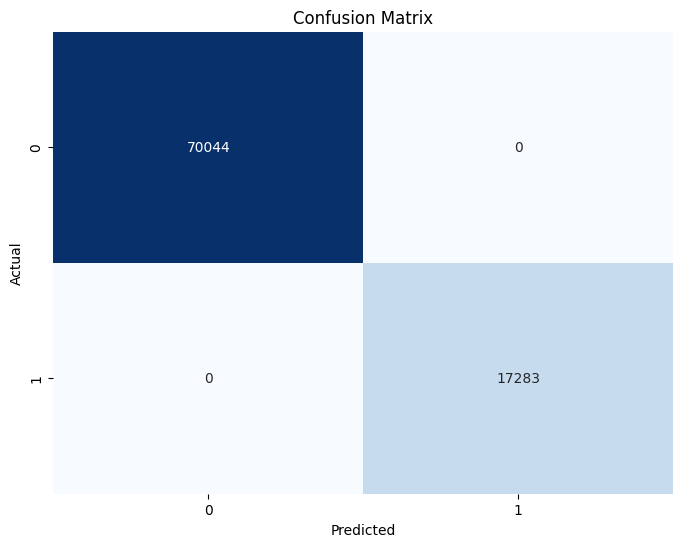

In [86]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
conf_matrix = confusion_matrix(y_test,y_pred_logistic )

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [82]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize the model
gda_model = QuadraticDiscriminantAnalysis()

# Train the model
gda_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_gda = gda_model.predict(X_test)

# Evaluate the model
print("Gaussian Discriminant Analysis Accuracy:", accuracy_score(y_test, y_pred_gda))
print("Gaussian Discriminant Analysis Classification Report:\n", classification_report(y_test, y_pred_gda))


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Gaussian Discriminant Analysis Accuracy: 0.9982594157591581
Gaussian Discriminant Analysis Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70044
           1       0.99      1.00      1.00     17283

    accuracy                           1.00     87327
   macro avg       1.00      1.00      1.00     87327
weighted avg       1.00      1.00      1.00     87327



Confusion Matrix:
[[69892   152]
 [    0 17283]]


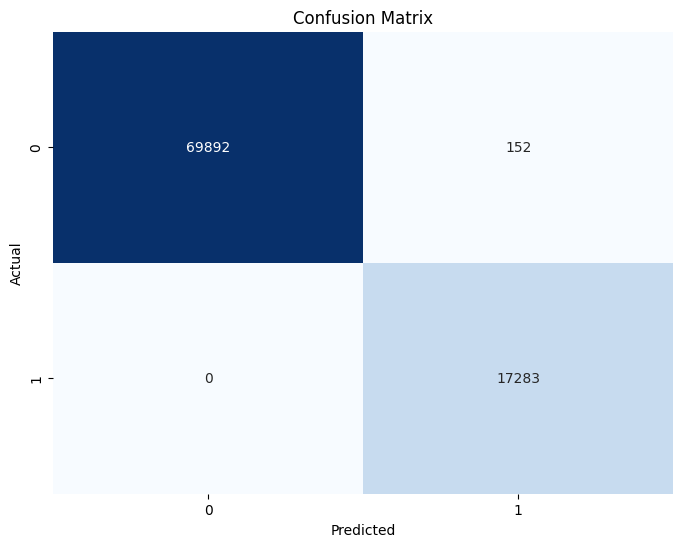

In [85]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
conf_matrix = confusion_matrix(y_test, y_pred_gda)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the FFNN model
ffnn_model = Sequential([
    Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ffnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ffnn_model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = ffnn_model.evaluate(X_test, y_test)
y_pred_ffnn = (ffnn_model.predict(X_test) > 0.5).astype("int32")

print("Feed-Forward Neural Network Accuracy:", accuracy)
print("Feed-Forward Neural Network Classification Report:\n", classification_report(y_test, y_pred_ffnn))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10215/10215 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9637 - loss: 0.0790 - val_accuracy: 1.0000 - val_loss: 1.5325e-05
Epoch 2/50
10215/10215 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9998 - loss: 6.6083e-04 - val_accuracy: 1.0000 - val_loss: 2.5312e-06
Epoch 3/50
10215/10215 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 1.0000 - loss: 8.7587e-05 - val_accuracy: 1.0000 - val_loss: 3.1328e-06
Epoch 4/50
10215/10215 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9999 - loss: 5.0104e-04 - val_accuracy: 1.0000 - val_loss: 1.7123e-07
Epoch 5/50
10215/10215 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 1.0000 - loss: 2.0632e-04 - val_accuracy: 1.0000 - val_loss: 2.1275e-06
Epoch 6/50
10215/10215 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9999 - loss: 7.1090e-04 - val_accuracy: 1.0000 - val_loss: 1.9540e-07
Epoch 7/50
10215/10215 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 1.0000 - loss: 1.5233e-07 - val_accuracy: 1.0000 - val_loss: 4.0425e-09
Epoch 8/50
10215/

Confusion Matrix:
[[70044     0]
 [    0 17283]]


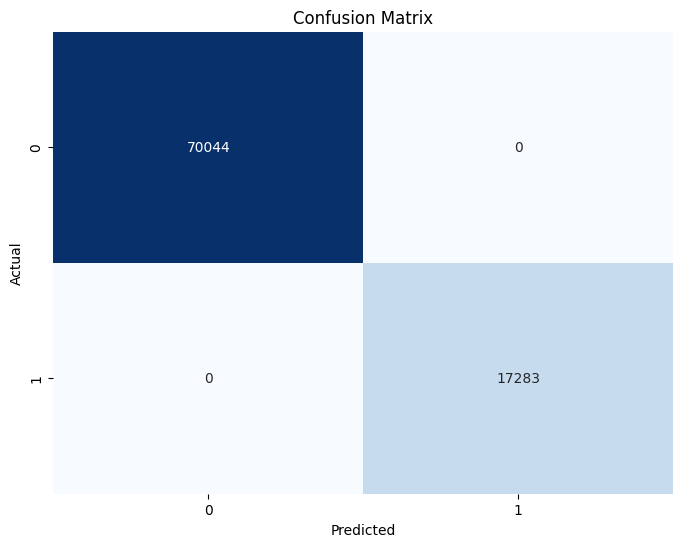

In [84]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
conf_matrix = confusion_matrix(y_test, y_pred_ffnn)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [87]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9993930857581275
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70044
           1       1.00      1.00      1.00     17283

    accuracy                           1.00     87327
   macro avg       1.00      1.00      1.00     87327
weighted avg       1.00      1.00      1.00     87327



Confusion Matrix:
[[70034    10]
 [   43 17240]]


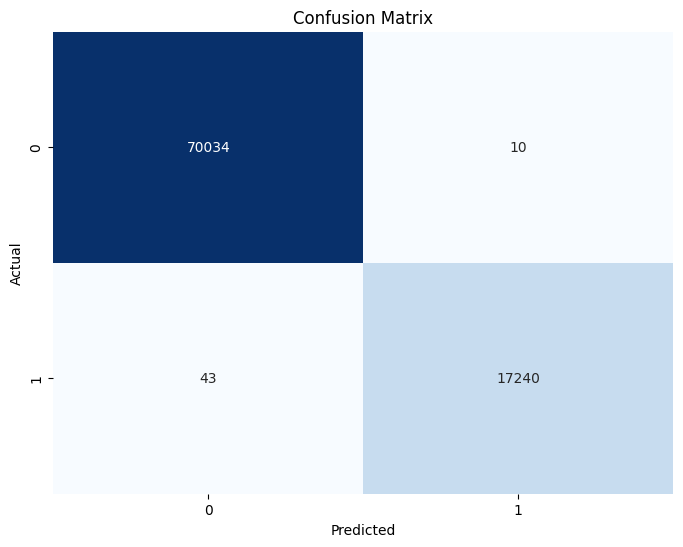

In [88]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
conf_matrix = confusion_matrix(y_test,y_pred_svm )

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()